<a href="https://colab.research.google.com/github/Sathwik003/Stock_Crypto_Allotment/blob/main/Stock_Crypto_Portfolio_Allocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Stock Market Data!

In [ ]:
# some useful modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

     |████████████████████████████████| 81 kB 2.9 MB/s 
     |████████████████████████████████| 83 kB 920 kB/s 
     |████████████████████████████████| 112 kB 46.2 MB/s 
     |████████████████████████████████| 127 kB 39.2 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=46c9653afb82b9c0a900c369212e2310ff626f87de83aa3cd512547aa07bb475
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=6fee770d9a944ce025804040887dd7862bc3a8cac22e80984e4f71d280adc43b
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=973b3c35b90f2063d158ee738a4ad1342acb89dbec158c45f5e435cd38ce0acd
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36ce

In [ ]:
# Assign the ticker list that we want to scrap
tickers_list = ['NEE','HPQ','MSI','ADBE','XRP-USD','ADA-USD','LUNA1-USD','HEX-USD']
# pull historical price data for each stocks to match with our news score later
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2016',end_date='12/31/2020',interval='1d') for ticker in tickers_list}

In [ ]:
# take a peak!
dow_prices

{'ADA-USD':                 open      high       low     close  adjclose      volume  \
 2017-11-09  0.025160  0.035060  0.025006  0.032053  0.032053    18716200   
 2017-11-10  0.032219  0.033348  0.026451  0.027119  0.027119     6766780   
 2017-11-11  0.026891  0.029659  0.025684  0.027437  0.027437     5532220   
 2017-11-12  0.027480  0.027952  0.022591  0.023977  0.023977     7280250   
 2017-11-13  0.024364  0.026300  0.023495  0.025808  0.025808     4419440   
 ...              ...       ...       ...       ...       ...         ...   
 2020-12-27  0.157835  0.165190  0.150378  0.154422  0.154422  1578354821   
 2020-12-28  0.154440  0.178583  0.153445  0.176735  0.176735  1732151279   
 2020-12-29  0.176709  0.196170  0.174039  0.192164  0.192164  2967669490   
 2020-12-30  0.192022  0.193144  0.175681  0.184040  0.184040  1849432295   
 2020-12-31  0.184034  0.185749  0.176594  0.181397  0.181397  1132268397   
 
              ticker  
 2017-11-09  ADA-USD  
 2017-11-10  ADA-

In [ ]:
# let's extract just the data we need (adjclose)
# get the adjclose price for the NFLX (one sample)
prep_data = pd.DataFrame(dow_prices['NEE']['adjclose']).rename(columns = {"adjclose":"NEE"})

# combine all the tickers (all the rest of the samples)
for i in tickers_list[0:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data

,NEE,HPQ,MSI,ADBE,XRP-USD,ADA-USD,LUNA1-USD,HEX-USD
2016-01-04,22.217052,9.554088,60.018883,91.970001,NaN,NaN,NaN,NaN
2016-01-05,22.433718,9.644687,59.357288,92.339996,NaN,NaN,NaN,NaN
2016-01-06,22.360785,9.298760,58.498962,91.019997,NaN,NaN,NaN,NaN
2016-01-07,22.459457,8.870475,57.318802,89.110001,NaN,NaN,NaN,NaN
2016-01-08,22.560270,8.713986,57.443989,87.849998,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-12-23,72.493858,23.420134,165.792801,496.910004,0.258602,0.136394,0.460945,0.005154
2020-12-24,73.127800,23.468504,165.655136,499.859985,0.337819,0.152883,0.519229,0.005755
2020-12-28,73.625198,23.478178,166.579453,498.950012,0.247958,0.176735,0.620016,0.008625
2020-12-29,73.469154,23.265358,164.150726,502.109985,0.220962,0.192164,0.647971,0.008940


# Data Cleaning

### Looking for Missing Values (NaNs)

In [ ]:
# import numpy 
import numpy as np 

# See the total number of missing values in each column
prep_data.isnull().sum()

NEE            0
HPQ            0
MSI            0
ADBE           0
XRP-USD      468
ADA-USD      468
LUNA1-USD    896
HEX-USD      996
dtype: int64

### Removing Missing Values

In [ ]:
#Remove the missing values 
prep_data.dropna(axis=0, inplace=True)

#see if any column still has any missing value 
prep_data.isnull().sum()

NEE          0
HPQ          0
MSI          0
ADBE         0
XRP-USD      0
ADA-USD      0
LUNA1-USD    0
HEX-USD      0
dtype: int64

In [ ]:
prep_data

,NEE,HPQ,MSI,ADBE,XRP-USD,ADA-USD,LUNA1-USD,HEX-USD
2019-12-17,57.292511,18.999512,155.608810,322.850006,0.183699,0.031800,0.222161,0.000171
2019-12-18,57.404793,18.962202,154.071854,324.380005,0.196176,0.034462,0.214379,0.000265
2019-12-19,57.490795,18.934217,155.734451,327.630005,0.190819,0.033251,0.218924,0.000256
2019-12-20,57.982929,19.176723,155.637802,327.609985,0.195316,0.034004,0.243993,0.000129
2019-12-23,57.044060,19.176723,156.788116,328.950012,0.190943,0.033200,0.280680,0.000116
...,...,...,...,...,...,...,...,...
2020-12-23,72.493858,23.420134,165.792801,496.910004,0.258602,0.136394,0.460945,0.005154
2020-12-24,73.127800,23.468504,165.655136,499.859985,0.337819,0.152883,0.519229,0.005755
2020-12-28,73.625198,23.478178,166.579453,498.950012,0.247958,0.176735,0.620016,0.008625
2020-12-29,73.469154,23.265358,164.150726,502.109985,0.220962,0.192164,0.647971,0.008940


Rather than use the raw time series, let's build a model based on past returns (the difference from the previous day).

In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return
past_returns = pd.DataFrame()
for i in tickers_list:
  past_returns[i] = prep_data[i].pct_change()
# drop the na records
past_returns.dropna(inplace=True)
past_returns

,NEE,HPQ,MSI,ADBE,XRP-USD,ADA-USD,LUNA1-USD,HEX-USD
2019-12-18,0.001960,-0.001964,-0.009877,0.004739,0.067921,0.083711,-0.035029,0.549708
2019-12-19,0.001498,-0.001476,0.010791,0.010019,-0.027307,-0.035140,0.021201,-0.033962
2019-12-20,0.008560,0.012808,-0.000621,-0.000061,0.023567,0.022646,0.114510,-0.496094
2019-12-23,-0.016192,0.000000,0.007391,0.004090,-0.022389,-0.023644,0.150361,-0.100775
2019-12-24,0.007245,0.001459,-0.003206,0.002098,0.006573,0.028976,0.142903,-0.387931
...,...,...,...,...,...,...,...,...
2020-12-23,-0.005086,0.002070,0.006927,-0.014400,-0.423340,-0.126682,-0.095289,-0.045732
2020-12-24,0.008745,0.002065,-0.000830,0.005937,0.306328,0.120892,0.126445,0.116608
2020-12-28,0.006802,0.000412,0.005580,-0.001820,-0.266003,0.156015,0.194109,0.498697
2020-12-29,-0.002119,-0.009065,-0.014580,0.006333,-0.108873,0.087300,0.045088,0.036522


# Visualize the Time Series

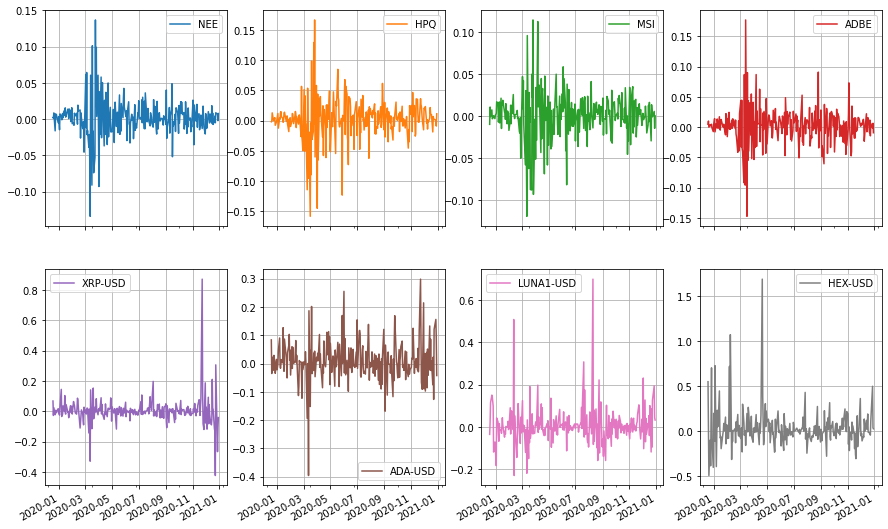

In [ ]:
# Adding a plot to analyse past retuns
past_returns.plot(subplots=True,
        grid=True, 
        layout=(3,4),
         figsize=(15,15))
plt.show()

In [ ]:
# install pyomo
!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' # THIS IS NEW! We are using the IPOPT Solver.
except:
    pass

     |████████████████████████████████| 9.6 MB 3.1 MB/s 
     |████████████████████████████████| 49 kB 4.2 MB/s 


### Average Return and Standard Deviation of Past Returns

In [ ]:
# Calculating Avg return and Standard Deviation
Avg_Return = pd.DataFrame(np.mean(past_returns) ,columns=["Avg_Return"])
print(Avg_Return)
StdDev_Return = pd.DataFrame(np.std(past_returns) ,columns=["StdDev_Return"])
print(StdDev_Return)

           Avg_Return
NEE          0.001314
HPQ          0.001400
MSI          0.000578
ADBE         0.002096
XRP-USD      0.003770
ADA-USD      0.009231
LUNA1-USD    0.007619
HEX-USD      0.030897
           StdDev_Return
NEE             0.025738
HPQ             0.033833
MSI             0.027189
ADBE            0.029668
XRP-USD         0.084262
ADA-USD         0.069760
LUNA1-USD       0.087229
HEX-USD         0.198565


### Covariance Matrix

In [ ]:
# Covariance matrix
Covariance_matrix = past_returns.cov()
Covariance_matrix

,NEE,HPQ,MSI,ADBE,XRP-USD,ADA-USD,LUNA1-USD,HEX-USD
NEE,0.000665,0.000473,0.000448,0.000380,0.000364,0.000557,0.000333,-0.000118
HPQ,0.000473,0.001149,0.000549,0.000451,0.000615,0.000537,0.000688,-0.000408
MSI,0.000448,0.000549,0.000742,0.000446,0.000493,0.000650,0.000462,-0.000131
ADBE,0.000380,0.000451,0.000446,0.000884,0.000563,0.000760,0.000579,-0.000179
XRP-USD,0.000364,0.000615,0.000493,0.000563,0.007127,0.003774,0.001936,0.000318
ADA-USD,0.000557,0.000537,0.000650,0.000760,0.003774,0.004885,0.002320,0.000998
LUNA1-USD,0.000333,0.000688,0.000462,0.000579,0.001936,0.002320,0.007638,0.000722
HEX-USD,-0.000118,-0.000408,-0.000131,-0.000179,0.000318,0.000998,0.000722,0.039580


### We can also see the Correlation Matrix

In [ ]:
# Correlation Matrix
Correlation_matrix = past_returns.corr()
Correlation_matrix

,NEE,HPQ,MSI,ADBE,XRP-USD,ADA-USD,LUNA1-USD,HEX-USD
NEE,1.000000,0.541671,0.637469,0.495263,0.167247,0.308854,0.147894,-0.023041
HPQ,0.541671,1.000000,0.594660,0.448065,0.214750,0.226744,0.232352,-0.060496
MSI,0.637469,0.594660,1.000000,0.550410,0.214559,0.341148,0.194154,-0.024227
ADBE,0.495263,0.448065,0.550410,1.000000,0.224529,0.366040,0.222814,-0.030303
XRP-USD,0.167247,0.214750,0.214559,0.224529,1.000000,0.639599,0.262448,0.018932
ADA-USD,0.308854,0.226744,0.341148,0.366040,0.639599,1.000000,0.379832,0.071739
LUNA1-USD,0.147894,0.232352,0.194154,0.222814,0.262448,0.379832,1.000000,0.041501
HEX-USD,-0.023041,-0.060496,-0.024227,-0.030303,0.018932,0.071739,0.041501,1.000000


# Nonlinear Optimization Model

In [ ]:
# creating covariance table on stock return dataframe
df_cov = past_returns.cov()
print('Covariance Matrix:')
print(df_cov)
print('\n') # return/blank line

# create the average of each stock
# these are the objective function COEFFICIENTS!
df_return = past_returns.mean()
print('Average Return:')
print(df_return)

Covariance Matrix:
                NEE       HPQ       MSI      ADBE   XRP-USD   ADA-USD  \
NEE        0.000665  0.000473  0.000448  0.000380  0.000364  0.000557   
HPQ        0.000473  0.001149  0.000549  0.000451  0.000615  0.000537   
MSI        0.000448  0.000549  0.000742  0.000446  0.000493  0.000650   
ADBE       0.000380  0.000451  0.000446  0.000884  0.000563  0.000760   
XRP-USD    0.000364  0.000615  0.000493  0.000563  0.007127  0.003774   
ADA-USD    0.000557  0.000537  0.000650  0.000760  0.003774  0.004885   
LUNA1-USD  0.000333  0.000688  0.000462  0.000579  0.001936  0.002320   
HEX-USD   -0.000118 -0.000408 -0.000131 -0.000179  0.000318  0.000998   

           LUNA1-USD   HEX-USD  
NEE         0.000333 -0.000118  
HPQ         0.000688 -0.000408  
MSI         0.000462 -0.000131  
ADBE        0.000579 -0.000179  
XRP-USD     0.001936  0.000318  
ADA-USD     0.002320  0.000998  
LUNA1-USD   0.007638  0.000722  
HEX-USD     0.000722  0.039580  


Average Return:
NEE     

### Defining Variables

In [ ]:
from pyomo.environ import *
m = ConcreteModel()

# defining variables
# each one is a stock (Computer, Chemical, Power, Auto, Electronic)
m.NEE = Var(within=NonNegativeReals, bounds=(0,1))
m.HPQ = Var(within=NonNegativeReals, bounds=(0,1))
m.MSI = Var(within=NonNegativeReals, bounds=(0,1))
m.ADBE = Var(within=NonNegativeReals, bounds=(0,1))
m.XRP_USD = Var(within=NonNegativeReals, bounds=(0,1))
m.ADA_USD = Var(within=NonNegativeReals, bounds=(0,1))
m.LUNA1_USD = Var(within=NonNegativeReals, bounds=(0,1))
m.HEX_USD = Var(within=NonNegativeReals, bounds=(0,1))

### Declaring Constraints and Objectives

In [ ]:
# declare objective
m.objective = Objective(expr =               
                        m.NEE*df_return[0] + 
                        m.HPQ*df_return[1] + 
                        m.MSI*df_return[2] +
                        m.ADBE*df_return[3] + 
                        m.XRP_USD*df_return[4] +
                        m.ADA_USD*df_return[5] +
                        m.LUNA1_USD*df_return[6] +
                        m.HEX_USD*df_return[7],
                        sense=maximize) # yes, we want to MAX our returns!

# declare constraints
# 1. Sum of all porportions = 1
m.sum_proportions = Constraint(expr = m.NEE + m.HPQ + m.MSI + m.ADBE + m.XRP_USD + m.ADA_USD + m.LUNA1_USD + m.HEX_USD == 1)

# 3. Set maximum risk: WE ARE INCLUDING THIS CONSTRAINT NOW FOR TECHNICAL REASONS (see below), YOU CAN (and should!) IGNORE IT FOR NOW!
m.total_risk = Constraint(expr = m.NEE + m.HPQ + m.MSI + m.ADBE + m.XRP_USD + m.ADA_USD + m.LUNA1_USD + m.HEX_USD >= 0.0)




### Assigning risk limits

In [ ]:
# Creating calculations table for calculate the risk
# Calculate risk
def calc_risk(m):
  variables = m.NEE, m.HPQ, m.MSI, m.ADBE, m.XRP_USD, m.ADA_USD, m.LUNA1_USD, m.HEX_USD
  tickers = ["NEE","HPQ","MSI","ADBE","XRP-USD","ADA-USD","LUNA1-USD","HEX-USD"]
  risk_exp = 0
  for i in range(len(variables)):
    for j in range(len(variables)):
      risk_exp += variables[i]*df_cov.at[tickers[i],tickers[j]]*variables[j]
  return risk_exp

# We are going to use this expression to compute the risk
expr_risk = calc_risk(m)

# Max Risk Limit
max_risk = 0.1
# Sequence of risk levels
risk_limits = np.arange(0.001, max_risk, 0.0001) # take tiny steps
risk_limits

array([0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017,
       0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024, 0.0025,
       0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031, 0.0032, 0.0033,
       0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004 , 0.0041,
       0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047, 0.0048, 0.0049,
       0.005 , 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056, 0.0057,
       0.0058, 0.0059, 0.006 , 0.0061, 0.0062, 0.0063, 0.0064, 0.0065,
       0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071, 0.0072, 0.0073,
       0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008 , 0.0081,
       0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089,
       0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096, 0.0097,
       0.0098, 0.0099, 0.01  , 0.0101, 0.0102, 0.0103, 0.0104, 0.0105,
       0.0106, 0.0107, 0.0108, 0.0109, 0.011 , 0.0111, 0.0112, 0.0113,
       0.0114, 0.0115, 0.0116, 0.0117, 0.0118, 0.0119, 0.012 , 0.0121,
      

### Running the Model

In [ ]:
# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  # We remove and Recalculate risk in each iteration
  m.del_component(m.total_risk)
  # The LHS remains unchanged; we only modify the RHS (risk threshold)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # Run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m).write()
  # store our allocation proportions
  param_analysis[r] = [m.NEE() + m.HPQ() + m.MSI() + m.ADBE() + m.XRP_USD() + m.ADA_USD() + m.LUNA1_USD() + m.HEX_USD()]
  # Store our returns
  returns[r] =  m.NEE()*df_return[0] + m.HPQ()*df_return[1] + m.MSI()*df_return[2] + m.ADBE()*df_return[3] + m.XRP_USD()*df_return[4] + m.ADA_USD()*df_return[5] + m.LUNA1_USD()*df_return[6] + m.HEX_USD()*df_return[7]

Streaming output truncated to the last 5000 lines.
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.03687715530395508
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 8
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ------------------------

### Remove infeasible solutions

In [ ]:
from pyomo.opt import SolverStatus, TerminationCondition

# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  # Remove constraint to avoid error messages
  m.del_component(m.total_risk)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m)

  # If solution is not feasible, ignore this run
  if result.solver.termination_condition == TerminationCondition.infeasible:
    continue

  result = result.write()

  # store our allocation proportions
  param_analysis[r] = [m.NEE() , m.HPQ() , m.MSI() , m.ADBE() , m.XRP_USD() , m.ADA_USD() , m.LUNA1_USD() , m.HEX_USD()]
  # store our returns
  returns[r] =  m.NEE()*df_return[0] + m.HPQ()*df_return[1] + m.MSI()*df_return[2] + m.ADBE()*df_return[3] + m.XRP_USD()*df_return[4] + m.ADA_USD()*df_return[5] + m.LUNA1_USD()*df_return[6] + m.HEX_USD()*df_return[7]


Streaming output truncated to the last 5000 lines.
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.038240671157836914
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 8
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# -----------------------

### Parameter Analysis

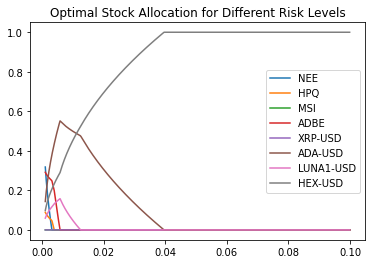

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = [ 'NEE', 'HPQ', 'MSI', 'ADBE', 'XRP-USD', 'ADA-USD', 'LUNA1-USD', 'HEX-USD' ]
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.show()

In [ ]:
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward) # we aren't allowed to name our value 'return' - this is a reserved name.

[0.001, 0.0011, 0.0012000000000000001, 0.0013000000000000002, 0.0014000000000000002, 0.0015000000000000002, 0.0016000000000000003, 0.0017000000000000003, 0.0018000000000000004, 0.0019000000000000004, 0.0020000000000000005, 0.0021000000000000003, 0.0022000000000000006, 0.002300000000000001, 0.0024000000000000007, 0.0025000000000000005, 0.0026000000000000007, 0.002700000000000001, 0.002800000000000001, 0.0029000000000000007, 0.003000000000000001, 0.003100000000000001, 0.003200000000000001, 0.003300000000000001, 0.003400000000000001, 0.0035000000000000014, 0.003600000000000001, 0.003700000000000001, 0.0038000000000000013, 0.0039000000000000016, 0.004000000000000002, 0.004100000000000001, 0.0042000000000000015, 0.004300000000000002, 0.004400000000000001, 0.004500000000000001, 0.004600000000000002, 0.004700000000000002, 0.004800000000000002, 0.004900000000000002, 0.005000000000000002, 0.005100000000000002, 0.005200000000000002, 0.005300000000000002, 0.005400000000000002, 0.00550000000000000

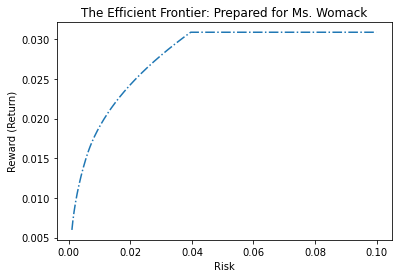

In [ ]:
# plot! pylab makes it easy
from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier: Prepared for Ms. Womack')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

In [ ]:
# Lets see the allocations for each stock at each risk level
param_analysis*100

,NEE,HPQ,MSI,ADBE,XRP-USD,ADA-USD,LUNA1-USD,HEX-USD
0.0010,31.813687,8.899876,0.000168,29.155351,0.000037,14.382054,5.955025,9.793802
0.0011,29.439526,8.588442,0.001454,28.838023,0.000144,16.144418,6.381949,10.606043
0.0012,27.267664,8.304205,0.001010,28.547997,0.000127,17.757174,6.772551,11.349271
0.0013,25.255206,8.038354,0.000128,28.279919,0.000033,19.252909,7.134907,12.038544
0.0014,23.368819,7.790560,0.000122,28.028117,0.000032,20.653890,7.474271,12.684189
...,...,...,...,...,...,...,...,...
0.0995,0.000009,0.000009,0.000009,0.000009,0.000010,0.000014,0.000012,99.999928
0.0996,0.000009,0.000009,0.000009,0.000009,0.000010,0.000014,0.000012,99.999928
0.0997,0.000009,0.000009,0.000009,0.000009,0.000010,0.000014,0.000012,99.999928
0.0998,0.000009,0.000009,0.000009,0.000009,0.000010,0.000014,0.000012,99.999928


# Monte Carlo Simulation

From our portfolio distribution, we can see that for a risk level close to 0.004, four assets have a significant return compared to the rest. Hence we have chose the risk level and assets that yield a return for the simulation

### Data Preparation for Simulation

In [ ]:
risk_level=0.004900000000000002 #Chosen risk level

In [ ]:
asset_selected = ['HEX-USD','ADA-USD','LUNA1-USD','ADBE'] #Selecting the assets for the simualtion
portfolio= past_returns[asset_selected] #Subsetting the returns dataframe for the chosen assets

In [ ]:
portfolio_cov=portfolio.cov() #Calculating the portfolio of the the 4 assets chosen

In [ ]:
portfolio=portfolio.reset_index() #Resetting the index to subset by the date column


In [ ]:
portfolio.rename({'index':'Date'},axis=1, inplace=True) #Renaming the column for easy access and understanding

In [ ]:

allocation=param_analysis.reset_index() #Restting the index of the portfolio allocation for filtering using risk level



In [ ]:
allocation.rename({'index':'Risk Level'},axis=1,inplace=True) #Renaming the column for easy access

In [ ]:
port_allocation=allocation[allocation['Risk Level']==risk_level] #Subsetting the portfolio allocation for a certain risk level
port_allocation=port_allocation[asset_selected] #Subsetting the portfolio allocation for the assets chosen
port_allocation.reset_index(drop=True,inplace=True) #Dropping index
print(port_allocation) #Printing the allocation for the certain risk level and chosen assets

    HEX-USD   ADA-USD  LUNA1-USD     ADBE
0  0.264694  0.499975   0.146692  0.08863


In [ ]:
#Sotring the asset portfolio allocation as individual variables
asset1=port_allocation.iloc[0,0] 
asset2=port_allocation.iloc[0,1]
asset3=port_allocation.iloc[0,2]
asset4=port_allocation.iloc[0,3]

### Multi variate simulation

In [ ]:
iterations=1000 #Initializing the number of itirations
return_sum=[] #Initializing an empty list to store the returns from the simulation
port_sum=0 #Initializing a variable to calculate the sum of return from all assets
loss=0 #Initializing a variable to store the loss count
for i in range(iterations): #Running the simulation a 1000 times
  simulation=np.random.multivariate_normal(mean(portfolio),portfolio_cov) #Simulating the trading value based  on gaussian multivariate normal method.
  port_sum=simulation[0]*asset1+simulation[1]*asset2+simulation[2]*asset3+simulation[3]*asset4 #Calculating the sum of return for all assets combined
  return_sum.append(port_sum) #Appending the sum of return to the list above
  if port_sum<0: #Calculating if the return is a loss or profit
    loss+=1 #Counter to calculate the number of losses

probability=(loss/iterations)*100 #Calculating the probabitliy of the loss with the portfolio allocation mentioned above
print("Probability of Loss: ", probability) #Priting the probability of the loss
 

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Probability of Loss:  40.5


### Density Plot for Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


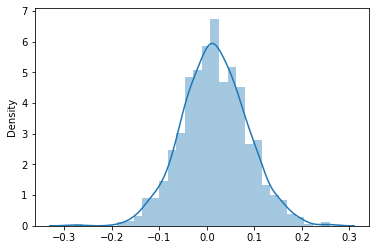

In [ ]:
import seaborn as sns #Importing seaborn library for density plot
sns.distplot(return_sum) #Plotting the density plot for the returned sum. 

#### Analysis from the density plot

1.   For our portfolio allocation, the probability of profit is slightly greater than the probability of loss. 
The peak of the distribution is slightly towards the right of zero indicating the same. 

2.   Though the probability of profit is greater than probability of loss, from the distribution, we can see that the returns, if profitable, is slightly greater than loss making the investment advisable. 



# Portfolio Analysis


### Comparision with S&P 500 and DowJones Index

In [ ]:
selected_port=['HEX-USD','ADA-USD','LUNA1-USD','ADBE','^DJI','^GSPC']#selected stock and SP500 and Dow
dow_prices_1 = {ticker : si.get_data(ticker,start_date = '12/01/2020',end_date='12/01/2021',interval='1mo') for ticker in selected_port}
prep_data_1 = pd.DataFrame(dow_prices_1['HEX-USD']['adjclose']).rename(columns = {"adjclose":"HEX-USD"})
# Combine all the tickers
for i in selected_port[1:]:
  prep_data_1[i] = pd.DataFrame(dow_prices_1[i]['adjclose'])
prep_data_1

return_data_1 = pd.DataFrame()
for i in selected_port:
  return_data_1[i] = prep_data_1[i].pct_change()
# Drop the na records
return_data_1.dropna(inplace=True)
#Rename necessary colunms
return_data_1.rename(columns={'^DJI': 'DowJones Index', '^GSPC': 'S&P 500'},inplace=True)
#Add aggregate
return_data_1['Aggregate']=return_data_1['HEX-USD']*asset1+return_data_1['ADA-USD']*asset2+return_data_1['LUNA1-USD']*asset3+return_data_1['ADBE']*asset4 
return_data_1

,HEX-USD,ADA-USD,LUNA1-USD,ADBE,DowJones Index,S&P 500,Aggregate
2021-01-01,-0.491495,0.901343,1.239119,-0.082680,-0.020383,-0.011137,0.494994
2021-02-01,0.139978,2.792597,2.661454,0.001962,0.031677,0.026091,1.823868
2021-03-01,1.153337,-0.087760,2.495669,0.034155,0.066247,0.042439,0.630524
2021-04-01,-0.013125,0.133403,-0.107652,0.069357,0.027085,0.052425,0.053580
2021-05-01,1.960498,0.288609,-0.606682,-0.007397,0.019324,0.005486,0.573579
2021-06-01,0.605846,-0.206169,-0.006264,0.160649,-0.000780,0.022214,0.070604
2021-07-01,0.464663,-0.044184,0.649284,0.061454,0.012549,0.022748,0.201594
2021-08-01,1.058437,1.096635,1.934064,0.067677,0.012173,0.028990,1.118161
2021-09-01,0.564639,-0.237341,0.223029,-0.132560,-0.042895,-0.047569,0.051759
2021-10-01,-0.413185,-0.070669,0.111086,0.129646,0.058375,0.069144,-0.116914


## Remodelling and Adding Allocation Constraints

In [ ]:
#model2
m1 = ConcreteModel()

# Defining variables
# Each one is a asset selected above (NEE, HPQ, MSI, ADBE, XRP_USD, ADA_USD, LUNA1_USD, HEX_USD)
m1.NEE = Var(within=NonNegativeReals, bounds=(0,1))
m1.HPQ = Var(within=NonNegativeReals, bounds=(0,1))
m1.MSI = Var(within=NonNegativeReals, bounds=(0,1))
m1.ADBE = Var(within=NonNegativeReals, bounds=(0,1))
m1.XRP_USD = Var(within=NonNegativeReals, bounds=(0,1))
m1.ADA_USD = Var(within=NonNegativeReals, bounds=(0,1))
m1.LUNA1_USD = Var(within=NonNegativeReals, bounds=(0,1))
m1.HEX_USD = Var(within=NonNegativeReals, bounds=(0,1))

#Logic constraints
m1.NEE_l= Var(domain=Binary)
m1.HPQ_l = Var(domain=Binary)
m1.MSI_l = Var(domain=Binary)
m1.ADBE_l =Var(domain=Binary)
m1.XRP_USD_l = Var(domain=Binary)
m1.ADA_USD_l = Var(domain=Binary)
m1.LUNA1_USD_l= Var(domain=Binary)
m1.HEX_USD_l= Var(domain=Binary)

In [ ]:
# Declare objective
m1.objective = Objective(expr =  
                        m1.NEE*m1.NEE_l*df_return[0]+
                        m1.HPQ*m1.HPQ_l*df_return[1]+
                        m1.MSI*m1.MSI_l*df_return[2]+
                        m1.ADBE*m1.ADBE_l*df_return[3]+          
                        m1.XRP_USD*m1.XRP_USD_l*df_return[4] + 
                        m1.ADA_USD*m1.ADA_USD_l*df_return[5] + 
                        m1.LUNA1_USD*m1.LUNA1_USD_l*df_return[6] +
                        m1.HEX_USD*m1.HEX_USD_l*df_return[7],
                        sense=maximize)

In [ ]:
# Declare constraints
# 1. Sum of all proportions = 1
m1.sum_proportions = Constraint(expr = m1.NEE+ m1.HPQ+ m1.MSI+ m1.ADBE+ m1.XRP_USD+ m1.ADA_USD+ m1.LUNA1_USD+ m1.HEX_USD == 1)

# 2. Minimum return should be 0%
m1.return_floor = Constraint(expr = m1.objective >= 0.00)
m1.total_risk = Constraint(expr = m1.NEE+ m1.HPQ+ m1.MSI+ m1.ADBE+ m1.XRP_USD+ m1.ADA_USD+ m1.LUNA1_USD+ m1.HEX_USD >= 0.0)

# 3. 2 stocks as part of optimization model
m1.min_stocks = Constraint(expr = m1.NEE_l + m1.HPQ_l + m1.MSI_l + m1.ADBE_l >= 2)


# Two stocks should receive at least 10% of the budget each.
m1.constraints = ConstraintList()
m1.constraints.add(m1.NEE >= .1*m1.NEE_l)
m1.constraints.add(m1.HPQ >= .1*m1.HPQ_l) 
m1.constraints.add(m1.MSI >= .1*m1.MSI_l)
m1.constraints.add(m1.ADBE >= .1*m1.ADBE_l)
m1.constraints.add(m1.NEE_l + m1.HPQ_l + m1.MSI_l + m1.ADBE_l >=2)  #at least 2 stocks

In [ ]:
# creating calculations table for calculate the risk
def calc_risk1(m1):
  variables1 = m1.NEE, m1.HPQ, m1.MSI, m1.ADBE,m1.XRP_USD, m1.ADA_USD, m1.LUNA1_USD, m1.HEX_USD
  tickers1 = ['NEE','HPQ','MSI','ADBE','XRP-USD','ADA-USD','LUNA1-USD','HEX-USD']
  risk_exp1 = 0
  for i in range(len(variables1)):
    for j in range(len(variables1)):
      risk_exp1 += variables1[i]*df_cov.at[tickers1[i],tickers1[j]]*variables1[j]
  return risk_exp1

# We are going to use this expression to compute the risk
expr_risk1 = calc_risk1(m1)


In [ ]:
# 3. Max risk should be less than 0.10
max_risk1= 0.10
# Sequence of risk levels
risk_limits1 = np.arange(0.001, max_risk1, 0.0001) # take tiny steps
risk_limits1

array([0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017,
       0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024, 0.0025,
       0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031, 0.0032, 0.0033,
       0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004 , 0.0041,
       0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047, 0.0048, 0.0049,
       0.005 , 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056, 0.0057,
       0.0058, 0.0059, 0.006 , 0.0061, 0.0062, 0.0063, 0.0064, 0.0065,
       0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071, 0.0072, 0.0073,
       0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008 , 0.0081,
       0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089,
       0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096, 0.0097,
       0.0098, 0.0099, 0.01  , 0.0101, 0.0102, 0.0103, 0.0104, 0.0105,
       0.0106, 0.0107, 0.0108, 0.0109, 0.011 , 0.0111, 0.0112, 0.0113,
       0.0114, 0.0115, 0.0116, 0.0117, 0.0118, 0.0119, 0.012 , 0.0121,
      

## Parameter Analysis

In [ ]:
# updating risk contraint for each limit and then solving the problem
param_analysis1 = {} # key=risk, value =stock allocations 
returns1 = {} # key=risk, value = return
for r in risk_limits1:
  # We remove and recalculate risk in each allocation
  m1.del_component(m1.total_risk)
  # The LHS remains unchanged; we only modify the RHS (risk threshold)
  m1.total_risk = Constraint(expr = expr_risk1 <= r)
  # Run solver
  result1 = SolverFactory('ipopt', executable=ipopt_executable).solve(m1)
  # If solution is not feasible, ignore this run
  if result1.solver.termination_condition == TerminationCondition.infeasible:
    continue

  result1 = result1.write()
  # Storing the allocation proportions
  param_analysis1[r] = [m1.NEE(), m1.HPQ(), m1.MSI(), m1.ADBE(),m1.XRP_USD(), m1.ADA_USD(), m1.LUNA1_USD(), m1.HEX_USD()]
  # Storing the asset returns
  returns1[r] =  m1.NEE()*df_return[0]+m1.HPQ()*df_return[1]+m1.MSI()*df_return[2]+m1.ADBE()*df_return[3]+ m1.XRP_USD()*df_return[4] + m1.ADA_USD()*df_return[5] + m1.LUNA1_USD()*df_return[6] + m1.HEX_USD()*df_return[7] 




Streaming output truncated to the last 5000 lines.
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.0565190315246582
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 9
  Number of variables: 16
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ------------------------

## Portfolio Visualisation

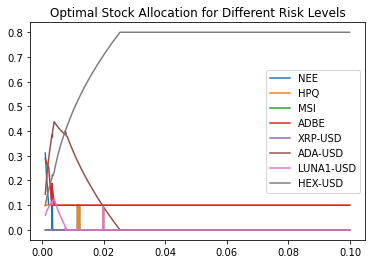

In [ ]:
# Assigning parameter analysis and preparing data for graph
param_analysis1 = pd.DataFrame.from_dict(param_analysis1, orient='index')
param_analysis1.columns = ['NEE','HPQ','MSI','ADBE','XRP-USD','ADA-USD','LUNA1-USD','HEX-USD']
param_analysis1.plot()

# Setting the title for the plot
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.show()

In [ ]:
# Allocation percentages at each risk level
param_analysis1*100

,NEE,HPQ,MSI,ADBE,XRP-USD,ADA-USD,LUNA1-USD,HEX-USD
0.0010,31.075783,10.001587,0.000240,28.812108,0.000022,14.412604,5.894584,9.803072
0.0011,28.494749,10.001177,0.000225,28.398439,0.000022,16.183300,6.304345,10.617743
0.0012,26.126368,10.010475,0.000594,28.016777,0.000060,17.803726,6.678738,11.363262
0.0013,23.938035,10.007322,0.000573,27.666581,0.000059,19.306252,7.026612,12.054565
0.0014,21.887730,10.005310,0.000557,27.338256,0.000058,20.713613,7.352395,12.702080
...,...,...,...,...,...,...,...,...
0.0995,0.000245,9.999672,0.000249,9.999881,0.000008,0.000009,0.000008,79.999929
0.0996,0.000245,9.999672,0.000249,9.999881,0.000008,0.000009,0.000008,79.999929
0.0997,0.000245,9.999672,0.000249,9.999881,0.000008,0.000009,0.000008,79.999929
0.0998,0.000245,9.999672,0.000249,9.999881,0.000008,0.000009,0.000008,79.999929


[0.001, 0.0011, 0.0012000000000000001, 0.0013000000000000002, 0.0014000000000000002, 0.0015000000000000002, 0.0016000000000000003, 0.0017000000000000003, 0.0018000000000000004, 0.0019000000000000004, 0.0020000000000000005, 0.0021000000000000003, 0.0022000000000000006, 0.002300000000000001, 0.0024000000000000007, 0.0025000000000000005, 0.0026000000000000007, 0.002700000000000001, 0.002800000000000001, 0.0029000000000000007, 0.003000000000000001, 0.003100000000000001, 0.003200000000000001, 0.003300000000000001, 0.003400000000000001, 0.0035000000000000014, 0.003600000000000001, 0.003700000000000001, 0.0038000000000000013, 0.0039000000000000016, 0.004000000000000002, 0.004100000000000001, 0.0042000000000000015, 0.004300000000000002, 0.004400000000000001, 0.004500000000000001, 0.004600000000000002, 0.004700000000000002, 0.004800000000000002, 0.004900000000000002, 0.005000000000000002, 0.005100000000000002, 0.005200000000000002, 0.005300000000000002, 0.005400000000000002, 0.00550000000000000

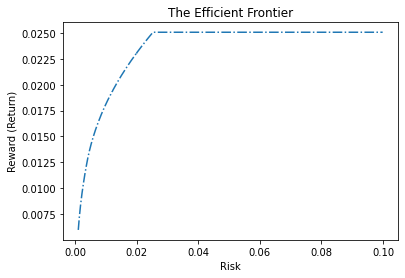

In [ ]:
# subset
risk1 = list(returns1.keys()) 
print(risk)
reward1 = list(returns1.values()) 
print(reward) # Printing reward
# plot! pylab makes it easy
from pylab import *
plot(risk1, reward1, '-.')
title('The Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

# Conclusions

* 1. Out of our portfolio, the top four investments observed were HEX_USD, ADA_USD, LUNA1_USD , ADOBE. Most part of the investable assets are cryptos (3 out of 4 selected assets).

* 2. In the selected portfolio , Cryptos have higher average returns than stocks (HEX_USD is observed to yeild highest avg returns).

* 3. In our linear optimixation model we identify 0.04 as the optimal risk level after which, even if the risk is increased, the returns remain constatnt and do not increase. 

* 4. By analysing the Stock allocation plots and Efficient fromtier plots In the integer programming model , we identify 0.02 as the optimal risk level after which , even if the risk is increased, there is no considerable increase in the returns on the portfolio.

* 5. Based on the above concluded inferences, we would recommend HEX_USD and ADA_USD as the most benifitting asset with considerable risk among all the other assets in the portfolio which gives a guaranteed return as both of our models which is evident from the two pareto charts. Therefore these assets must be a part of the portfolio to maximize the returns. Higher the risk, Higher the return in the above crypto.

* 6.  For our portfolio allocation, the probability of profit is slightly greater than the probability of loss. 
The peak of the distribution is slightly towards the right of zero indicating the same. 

* 7. Through allocation percentages for risk level we can observe that at low risk level of 0.01, the simulation allocated maximum percentage of portfolio for NEE and ADBE stocks, as the risk level increases allocation percentage increased for HEX-USD

* 8. Allocation for HPQ stock is almost same for any risk level


# Contributions
Team Contribution :     

1. Kushagra Goyal- EDA and Non-Linear Optimization

2. Fatima Yousuf- EDA and Non-Linear Optimization

3. Sathwik Pendyala - Monte Carlo Simulation and Portfolio Analysis 

4. Harsha Singh - Portfolio Analysis 

5. Aditya Krishnamurthy - Monte Carlo Simulation and Presentation